# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import scripts.load_data as ld
import scripts.data_analysis as da
import scripts.visualizations as vis

## Zadanie 1

#### Wczytanie metadanych

In [11]:
metadata = ld.read_metadata()

In [13]:
# Słowniki mapujące stare kody na nowe i kody stacji na miast
old_to_new_code, code_to_city = ld.get_code_mappings(metadata)
old_to_new_code

{'DsBogatMob': 'DsBogatFrancMOB',
 'DsCzer02': 'DsCzerStraza',
 'DsDzia01': 'DsDzialoszyn',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsJeleniaGoraA': 'DsJelGorOgin',
 'DsJeleniaGoraPM': 'DsJelGorSoko',
 'DsKlodzkoA': 'DsKlodzSzkol',
 'DsZabkowSemi': 'DsZabkPowWar',
 'DsPolanZdrojMOB': 'DsKudSlon',
 'DsLegRzeczA': 'DsLegPolarna',
 'DsNRudaSrebP': 'DsNowRudSreb',
 'DsOlawaSemi': 'DsOlawZolnAK',
 'DsOlesnicaPM': 'DsOlesBrzozo',
 'DsOsieczow': 'DsOsieczow21',
 'DsPolkKasz': 'DsPolKasztan',
 'DsSniezka': 'DsSniezkaObs',
 'DsSwidMob': 'DsSwidnMarciMOB',
 'DsSwidRynek': 'DsSwidnRynek',
 'DsSzczDZPM': 'DsSzczaKolej',
 'DsTrzebnica': 'DsTrzebniMaj',
 'DsWalbWysA': 'DsWalbrzWyso',
 'DsWrocWisA': 'DsWrocAlWisn',
 'DsWrocBartA': 'DsWrocBartni',
 'DsWrocGrobla': 'DsWrocNaGrob',
 'DsWrocKorzA': 'DsWrocWybCon',
 'DsZgorzBohA': 'DsZgorBohGet',
 'DsZlotoryjaPM': 'DsZlotoStasz',
 'KpBrodnicaKochanowskiego': 'KpBrodKochan',
 'KpBydgBerlinga': 'KpBydFieldor',
 'KpBydBerling': 'KpB

In [14]:
code_to_city

{'DsBialka': 'Białka',
 'DsBielGrot': 'Bielawa',
 'DsBogatFrancMOB': 'Bogatynia',
 'DsBogChop': 'Bogatynia',
 'DsBogZatonieMob': 'Bogatynia',
 'DsBoleslaMOB': 'Bolesławiec',
 'DsBrzegGlog': 'Brzeg Głogowski',
 'DsChojnowKil': 'Chojnów',
 'DsChojnowMalMOB': 'Chojnów',
 'DsCzar07': 'Czarna Góra',
 'DsCzerStraza': 'Czerniawa',
 'DsCzLasMob': 'Czarny Las',
 'DsDusznikMOB': 'Duszniki-Zdrój',
 'DsDuszZiel': 'Duszniki-Zdrój',
 'DsDzialoszyn': 'Działoszyn',
 'DsDziePilsud': 'Dzierżoniów',
 'DsDzierKras': 'Dzierżoniów',
 'DsGlogMob': 'Głogów',
 'DsGlogNorw': 'Głogów',
 'DsGlogNorwArch': 'Głogów',
 'DsGlogOrzech': 'Głogów',
 'DsGlogowko': 'Głogówko',
 'DsGlogSikor': 'Głogów',
 'DsGlogWiStwo': 'Głogów',
 'DsGrodziec': 'Grodziec Mały',
 'DsJasnaSport': 'Jasna Góra',
 'DsJawDmow': 'Jawor',
 'DsJaworMOB': 'Jawor',
 'DsJedlinaZdrMOB': 'Jedlina-Zdrój',
 'DsJedlZdroj': 'Jedlina-Zdrój',
 'DsJelGorOgin': 'Jelenia Góra',
 'DsJelGorSoko': 'Jelenia Góra',
 'DsJelw05': 'Jeleniów',
 'DsJgCiep': 'Jelenia Góra'

### Pobranie i preprocessing danych

In [15]:
dfs = []
chosen_years = [2014, 2019, 2024]
for year in chosen_years:
    df = ld.download_and_preprocess_data(year, code_to_city, old_to_new_code, header_index=1 if year != 2014 else 0)
    dfs.append(df)

/home/ania/Desktop/zaawansowane-techinki/polish-air-quality-trends/venv/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Sanity checks

In [16]:
for df, year in zip(dfs, chosen_years):
    print(f'{year}')
    print(
        f'Liczba dni: {df['Data'].dt.date.nunique()}'
    )
    print(f'Min: {df['Data'].min()}')
    print(f'Max: {df['Data'].max()}')
    print(f'Liczba kolumn: {len(df.columns)}')

2014
Liczba dni: 365
Min: 2014-01-01 00:00:00
Max: 2014-12-31 23:00:00
Liczba kolumn: 38
2019
Liczba dni: 365
Min: 2019-01-01 00:00:00
Max: 2019-12-31 23:00:00
Liczba kolumn: 66
2024
Liczba dni: 366
Min: 2024-01-01 00:00:00
Max: 2024-12-31 23:00:00
Liczba kolumn: 99


In [17]:
# Wybieramy tylko stacje wspólne dla wszystkich lat
stations = ld.get_common_stations(dfs)
stations

[('Radom', 'MzRadTochter'),
 ('Szczecin', 'ZpSzczPilsud'),
 ('Kędzierzyn-Koźle', 'OpKKozBSmial'),
 ('Kraków', 'MpKrakAlKras'),
 ('Żyrardów', 'MzZyraRoosev'),
 ('Siedlce', 'MzSiedKonars'),
 ('Kraków', 'MpKrakBulwar'),
 ('Płock', 'MzPlocMiReja'),
 ('Warszawa', 'MzWarAlNiepo'),
 ('Przemyśl', 'PkPrzemGrunw'),
 ('Bydgoszcz', 'KpBydPlPozna'),
 ('Złoty Potok', 'SlZlotPotLes'),
 ('Zielona Góra', 'LuZielKrotka'),
 ('Olsztyn', 'WmOlsPuszkin'),
 ('Szczecin', 'ZpSzczAndrze'),
 ('Katowice', 'SlKatoKossut'),
 ('Wrocław', 'DsWrocAlWisn'),
 ('Gdańsk', 'PmGdaLeczkow'),
 ('Łódź', 'LdLodzCzerni'),
 ('Legionowo', 'MzLegZegrzyn'),
 ('Kalisz', 'WpKaliSawick'),
 ('Warszawa', 'MzWarWokalna'),
 ('Zgierz', 'LdZgieMielcz')]

In [18]:
# Złączenie danych z trzech lat
df = ld.join_data_on_common_stations(dfs, stations)

In [19]:
data_path = 'data/pm25_gios_2014_2019_2024.csv'
df.to_csv(data_path, index=False)

In [22]:
# Kod do wczytywania danych z pliku
df = ld.read_data_from_csv(data_path)
df.head(5)

Miejscowość,Data,Rok,Miesiąc,Radom,Szczecin,Kędzierzyn-Koźle,Kraków,Żyrardów,Siedlce,Kraków,...,Olsztyn,Szczecin,Katowice,Wrocław,Gdańsk,Łódź,Legionowo,Kalisz,Warszawa,Zgierz
Kod stacji,,,,MzRadTochter,ZpSzczPilsud,OpKKozBSmial,MpKrakAlKras,MzZyraRoosev,MzSiedKonars,MpKrakBulwar,...,WmOlsPuszkin,ZpSzczAndrze,SlKatoKossut,DsWrocAlWisn,PmGdaLeczkow,LdLodzCzerni,MzLegZegrzyn,WpKaliSawick,MzWarWokalna,LdZgieMielcz
0,2014-01-01 01:00:00,2014,1,58.67,109.0,115.0,104.0,NaN,28.24,64.0,...,84.121582,105.4890,104.0,152.0,58.4,81.029259,44.44,NaN,63.49,119.696114
1,2014-01-01 02:00:00,2014,1,40.07,118.0,134.0,104.0,NaN,19.63,63.0,...,75.444382,149.7970,107.0,137.0,28.5,210.364670,103.07,82.5,36.28,70.337502
2,2014-01-01 03:00:00,2014,1,32.72,120.0,137.0,91.0,NaN,15.39,62.0,...,34.427513,86.9602,114.0,129.0,27.0,66.425789,74.91,83.0,30.77,40.915695
3,2014-01-01 04:00:00,2014,1,27.44,104.0,137.0,89.0,NaN,15.27,58.0,...,32.742474,74.8762,108.0,129.0,28.7,53.999668,39.27,73.1,31.69,37.817917
4,2014-01-01 05:00:00,2014,1,28.01,96.0,136.0,83.0,NaN,17.45,55.0,...,32.714367,61.9866,88.0,105.0,25.7,52.239670,26.51,74.9,36.86,38.814861


## Zadanie 2
#### Średnie miesięczne + trend dla miast


In [23]:
monthly_means = da.get_monthly_means_for_stations(df)

print("Średnie miesięczne dla każdej stacji:")
monthly_means

Średnie miesięczne dla każdej stacji:


Miejscowość                Radom     Szczecin Kędzierzyn-Koźle       Kraków  \
Kod stacji          MzRadTochter ZpSzczPilsud     OpKKozBSmial MpKrakAlKras   
(Rok, ) (Miesiąc, )                                                           
2014    1              40.485457    32.398922        42.847025    60.350806   
        2              53.218289    32.134731        43.510433    86.708955   
        3              43.391626    37.271277        45.567347    54.498652   
        4              27.699527    22.124302        29.082759    34.743300   
        5              14.581354    12.351079        16.551867    19.547718   
        6              12.382569    10.264873        15.101010    21.068056   
        7              14.962917    12.884511        17.140768    20.838710   
        8              14.104307    10.172320        13.721805    17.806452   
        9              21.467406    17.033333        21.807418    34.341246   
        10             35.588173    25.983849        35.432836    58.629032   
        11             37.405958    36.240343        41.856941    70.497222   
        12             39.569602    24.196629        44.927978    63.248656   
2019    1              38.959409    21.589361        39.263630    44.437842   
        2              34.469313    29.709672        36.635308    51.628711   
        3              23.061894    15.642228        21.542209    34.241134   
        4              24.902574    20.999196        23.492365    27.351649   
        5              13.811982    12.571101        13.394091    19.245740   
        6              11.600265    11.818980        11.895496    16.736521   
        7               9.887056     8.923612         9.539614    16.068176   
        8              11.900057    11.135310        10.151033    18.505074   
        9              14.316984    11.915484         9.987565    18.478363   
        10             24.648330    16.249518        17.383615    30.885971   
        11             23.785471    25.376699        20.286645    35.604025   
        12             27.819009    18.726237        21.408136    38.090401   
2024    1              21.623713    14.529032        26.152957    25.058309   
        2              18.350287    13.539511        13.536207    21.958779   
        3              23.949932    28.641319        20.068145    27.712948   
        4              14.071530    13.884444         9.398472    15.367922   
        5              11.177747    14.005511         8.028533    13.249866   
        6              11.488611    12.520139         8.288750    12.553750   
        7              10.175815    10.704704         7.623609    12.367742   
        8              11.917204    12.771909         9.262936    12.731565   
        9              15.653652    16.876111        12.187442    15.278442   
        10             17.613525    16.222581        12.995296    17.136022   
        11             22.847539    12.273194        19.244861    22.123889   
        12             24.661339    12.543280        27.586559    26.499322   

Miejscowość             Żyrardów      Siedlce       Kraków        Płock  \
Kod stacji          MzZyraRoosev MzSiedKonars MpKrakBulwar MzPlocMiReja   
(Rok, ) (Miesiąc, )                                                       
2014    1              36.824947    30.710269    47.241565    31.855108   
        2              55.307686    47.344554    62.591045    50.473512   
        3              45.742247    40.910263    39.900135    31.600595   
        4              26.113754    25.200014    24.543417    20.852646   
        5              14.187658    13.727911    14.522849    12.079019   
        6              11.302431    10.893750    14.140473     9.624125   
        7              14.274812    12.277581    14.062162    12.634177   
        8              12.510040    13.752298    12.622312    11.557197   
        9              20.328764    19.384659    22.745480    18.120570   
        10        

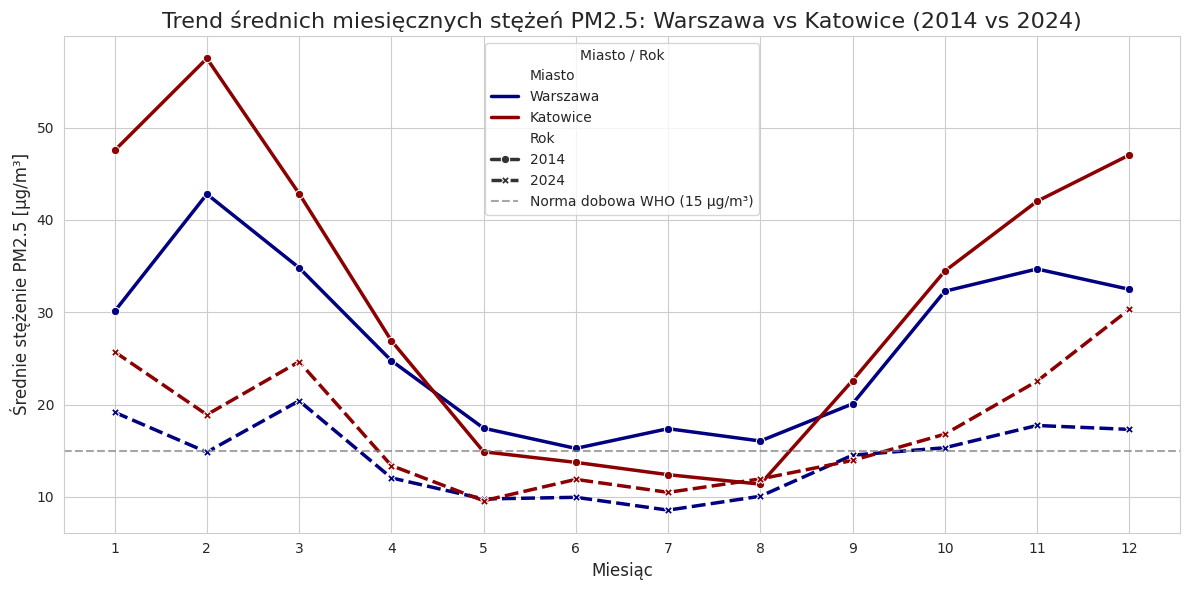

In [24]:
# Wykres trendów dla Katowic i Warszawy w latach 2014 i 2024
chosen_years = [2014, 2024]
chosen_cities = ['Warszawa', 'Katowice']

df_plot = da.get_chosen_monthly_means(df, chosen_years, chosen_cities)
vis.plot_trends_for_chosen_cities(df_plot, chosen_years, chosen_cities)

Wykres przedstawia średnie miesięczne stężenie pyłu PM2.5 dla Warszawy i Katowic, porównując sytuację z roku 2014 (linie przerywane) z rokiem 2024 (linie ciągłe). Dane zostały uśrednione dla wszystkich stacji pomiarowych w obrębie danego miasta.

Wyraźnie widać wysokie stężenia w miesiącach zimowych (styczeń, luty, grudzień) i niskie w letnich. Wskazuje to na kluczową rolę sezonu grzewczego w emisji zanieczyszczeń.

Zarówno w Warszawie, jak i w Katowicach, linie dla roku 2024 znajdują się znacząco niżej niż dla roku 2014 (szczególnie w miesiącach zimowych). Oznacza to znaczną poprawę jakości powietrza w ciągu ostatniej dekady.

Katowice generalnie wykazują wyższe stężenia PM2.5 niż Warszawa, szczególnie w miesiącach zimowych roku 2014, co wynika ze specyfiki regionu i źródeł ogrzewania. Jednak w 2024 roku różnica ta w miesiącach letnich niemal zanika, a w zimowych jest znacznie mniejsza niż dekadę wcześniej.

## Zadanie 3
#### Uśrednienie danych po stacjach w miejscowości i miesiącu w każdym roku

In [25]:
df_means = da.get_monthly_means_for_cities(df)
df_means.head(5)

Miejscowość,Rok,Miesiąc,Bydgoszcz,Gdańsk,Kalisz,Katowice,Kraków,Kędzierzyn-Koźle,Legionowo,Olsztyn,...,Radom,Siedlce,Szczecin,Warszawa,Wrocław,Zgierz,Zielona Góra,Złoty Potok,Łódź,Żyrardów
0,2014,1,30.616434,15.574259,42.099015,47.531587,53.805108,42.847025,39.815343,25.550652,...,40.485457,30.710269,30.648653,30.108373,42.797037,31.518199,42.946602,25.105590,35.407387,36.824947
1,2014,2,51.856173,25.712251,52.429559,57.502297,74.578125,43.510433,62.753609,40.799969,...,53.218289,47.344554,27.378568,42.801541,38.649351,46.359747,33.748299,32.390863,45.704915,55.307686
2,2014,3,40.556041,15.098253,53.279132,42.855405,47.188844,45.567347,47.863719,24.921921,...,43.391626,40.910263,30.315625,34.825151,36.125000,36.861373,37.276358,21.564371,35.259896,45.742247
3,2014,4,19.772776,13.423333,32.493501,26.925608,29.664583,29.082759,27.777273,17.748875,...,27.699527,25.200014,19.254632,24.765423,25.353659,18.767278,23.778929,14.539735,23.474251,26.113754
4,2014,5,11.903410,10.499194,17.961618,14.893387,16.926075,16.551867,14.622747,13.588730,...,14.581354,13.727911,11.616565,17.449219,14.963925,11.068347,12.545727,8.812585,16.407493,14.187658


#### Heatmapy średnich miesięcznych

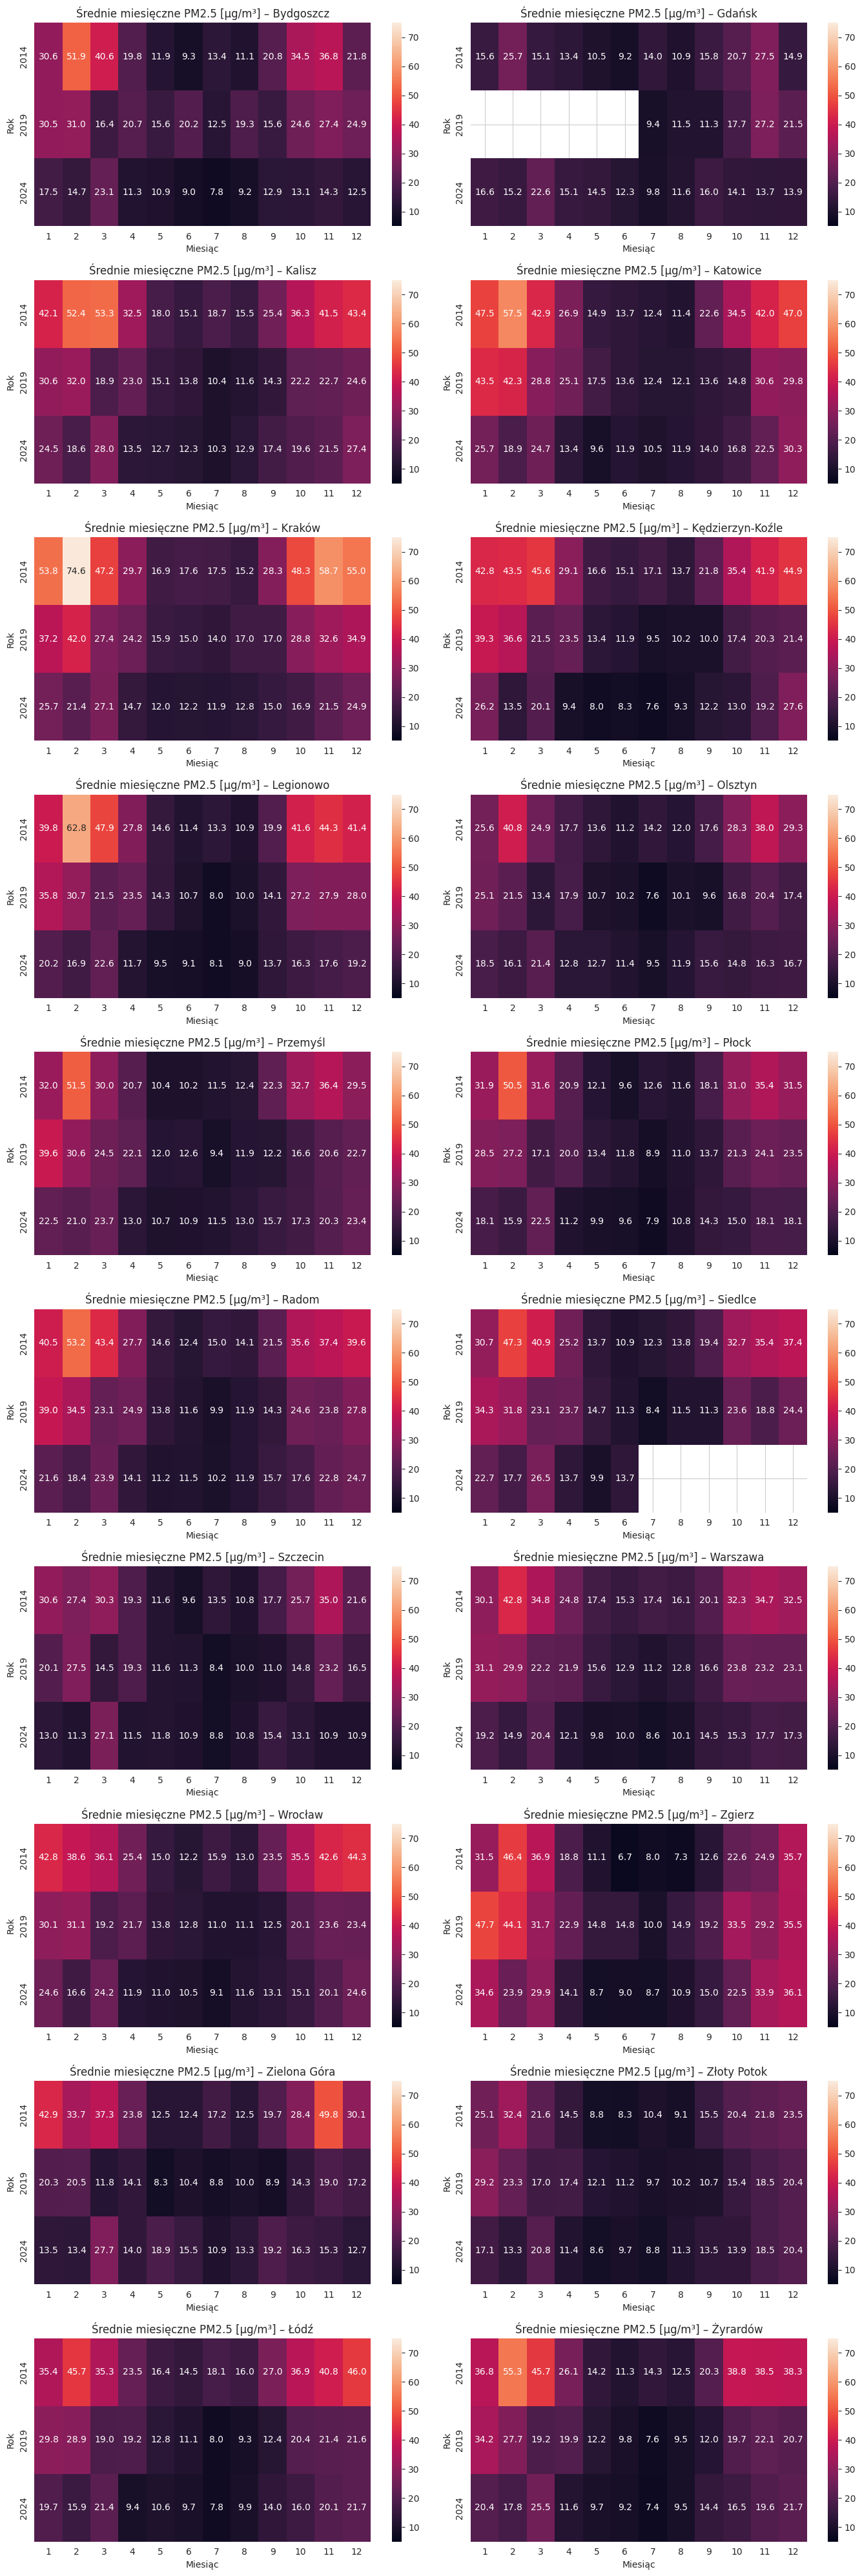

In [26]:
vis.plot_heatmaps_for_cities(df_means)

Patrząc na powyższe wykresy, możemy zauważyć podobny trend we wszystkich raportowanych miastach, a mianowicie najwyższe stężenia drobnego pyłu w sezonie grzewczym, przede wszystkim w lutym i listopadzie/grudniu. Nie jest to zaskakujące, jako że jednym z głównych żródeł PM2.5 w Polsce jest spalanie paliw stałych w domowych piecach i kotłach [[Polski Alarm Smogowy](https://polskialarmsmogowy.pl/smog/skad-sie-bierze-smog/)]. 

Widzimy jednak obiecującą tendecję, jaką jest znaczne obniżenie stężenia PM2.5 w każdym z miast na przeciągu lat 2014-2024. W 2014 roku w każdym z przedstawionych miast zaobserwowane było kilkukrotne – od około dwukrotnego w Gdańsku do pięciokrotnego w Krakowie – przekroczenie dopuszczalnego przez WHO stężenia 15 µg/m³. W 2024 roku, ta wartość nadal była przekraczana w każdym z miast, jendak maksymalne średnie miesięczne stężenie w tym roku wahało się pomiędzy 20.4 (Warszawa) a 36.1 µg/m³ (Zgierz – miasto, w którym poprawa jest najmniejsza). Pokazuje to, że wdrożenie działania antysmogowe wdrażane w ostatniej dekadzie przynoszą realne efekty.

## Zadanie 4
#### Dni z przekroczeniem normy (WHO)

In [27]:
yearly_counts = da.get_who_norm_exceeding_days(df)
selected_stations = da.get_max_and_min_k_stations(yearly_counts, chosen_year=2024, k=3)

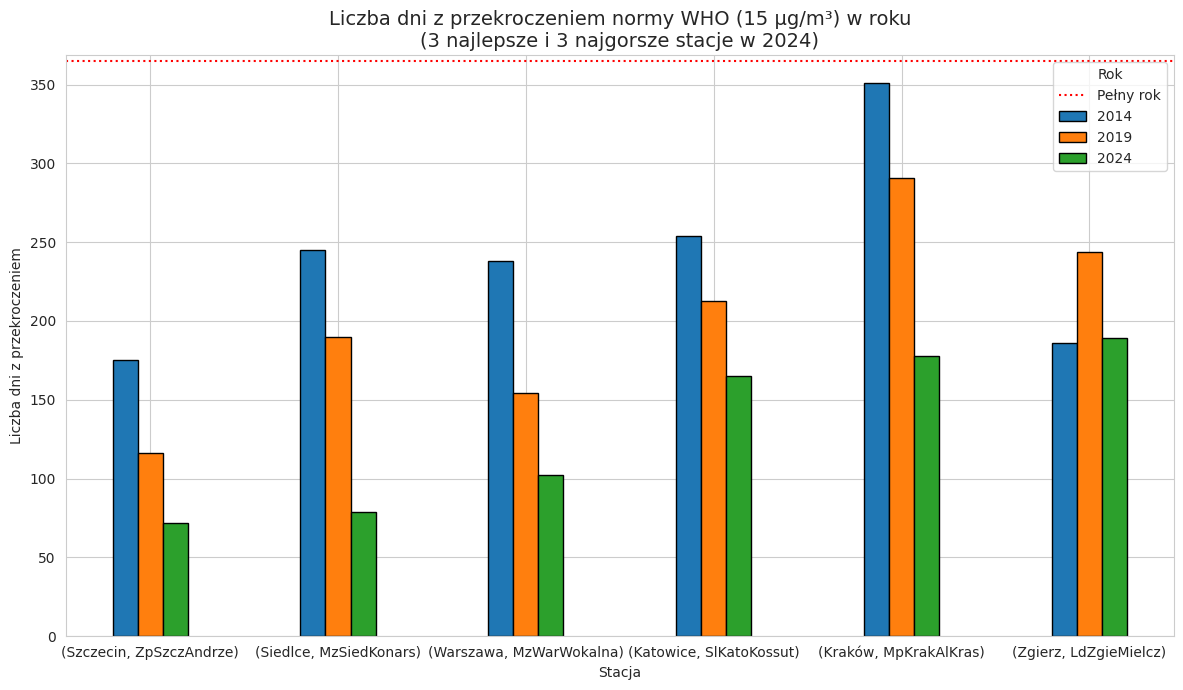

Tabela z wynikami:


,"(Data, )",2014,2019,2024
Miejscowość,Kod stacji,,,
Radom,MzRadTochter,272,211,161
Szczecin,ZpSzczPilsud,213,163,130
Kędzierzyn-Koźle,OpKKozBSmial,259,174,111
Kraków,MpKrakAlKras,351,291,178
Żyrardów,MzZyraRoosev,256,170,142
Siedlce,MzSiedKonars,245,190,79
Kraków,MpKrakBulwar,264,203,152
Płock,MzPlocMiReja,219,188,131
Warszawa,MzWarAlNiepo,305,299,152


In [28]:
vis.plot_who_exceeding_days(selected_stations)

print("Tabela z wynikami:")
display(yearly_counts[[2014, 2019, 2024]])

Analizując wykres przedstawiający liczbę dni z przekroczeniem normy WHO (15 µg/m³) w 3 najlepszych i 3 najgorszych stacjach, można zaobserwować dominującą tendencję malejącą w zanieczyszczeniu powietrza na przestrzeni lat 2014, 2019 i 2024. 

Największą bezwzględną poprawę, mierzoną największym spadkiem liczby dni z przekroczeniami, zanotowały stacje o najgorszej jakości powietrza (Kraków, Katowice), gdzie w 2014 roku przekroczenia sięgały odpowiednio 350 i 255 dni. Mimo ogólnej poprawy, w 2024 roku wciąż utrzymują się znaczące dysproporcje, ponieważ stacje w Krakowie, Zgierzu i Katowicach (jako najgorsze) nadal notują ponad 170 dni z przekroczeniem normy, co stanowi prawie połowę roku. 

Z drugiej strony, stacje najlepsze, takie jak Szczecin, osiągnęły duży sukces, redukując liczbę dni smogowych w 2024 roku do około 70, w porównaniu do ponad 175 dni w 2014. Kontrast pomiędzy stacjami o najlepszej i najgorszej jakości powietrza w 2024 roku (np. Szczecin vs. Kraków) wyraźnie wskazuje na potrzebę skupienia interwencji w najbardziej zanieczyszczonych lokalizacjach.